In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from imblearn .combine import SMOTETomek
from collections import Counter

Problem-2)
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

About the data:

Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

Solution:

In [ ]:
#loading the data
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
company=pd.read_csv('Company_Data.csv')
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

Basic and EDA

In [ ]:
company.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [ ]:
#adding sales Category feature
company['Sales_cat']=np.where(company['Sales']<=company['Sales'].mean(),'High','Low')
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes       Low  
1         10   Yes  Yes       Low  
2         12   Yes  Yes       Low  
3         14   Yes  Yes      High  
4         13   Yes   No      High

In [ ]:
company.Sales_cat = company.Sales_cat.astype(str)

In [ ]:
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US Sales_cat  
0           17   Yes  Yes       Low  
1           10   Yes  Yes       Low  
2           12   Yes  Yes       Low  
3           14   Yes  Yes      High  
4           13   Yes   No      High  
..         ...   ...  ...       ...  
395         14   Yes  Yes       Low  
396         11    No  Yes      High  
397         18   Yes  Yes      High  
398         12   Yes  Yes      High  
399         16   Yes  Yes       Low  

[400 rows x 12 columns]

In [ ]:
company.Sales_cat.value_counts()

High    201
Low     199
Name: Sales_cat, dtype: int64

In [ ]:
company.shape

(400, 12)

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  Sales_cat    400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


* All features are having correct datatype

In [ ]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_cat      0
dtype: int64

* There is no null values in data.

In [ ]:
company.duplicated().value_counts()

False    400
dtype: int64

* There are no duplicate records in dataset

In [ ]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

Visualizing data points

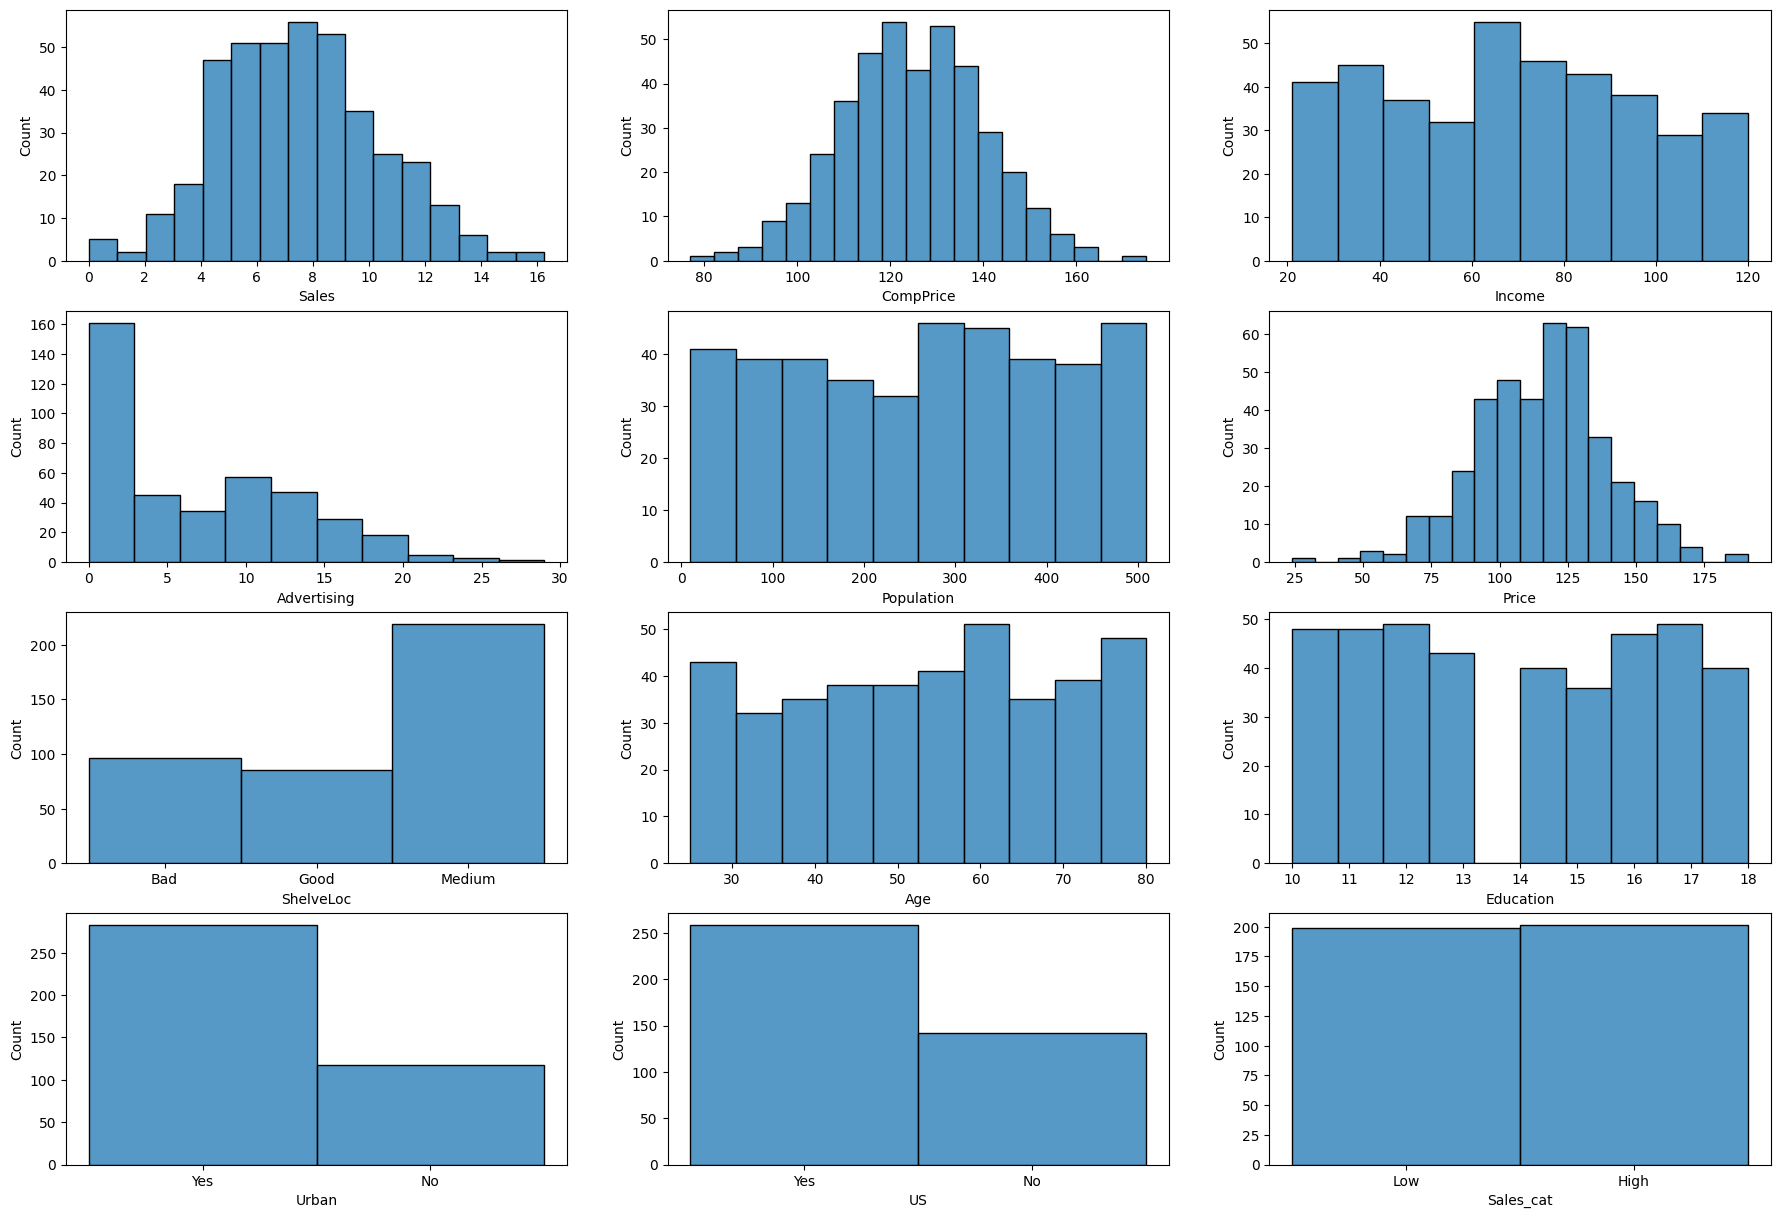

In [ ]:
#plotting histplots to observe datapoints 
plt.figure(figsize=(22,15))
for i, column in enumerate(company.columns, 1):
  plt.subplot(4,3,i)
  sns.histplot(company[column])

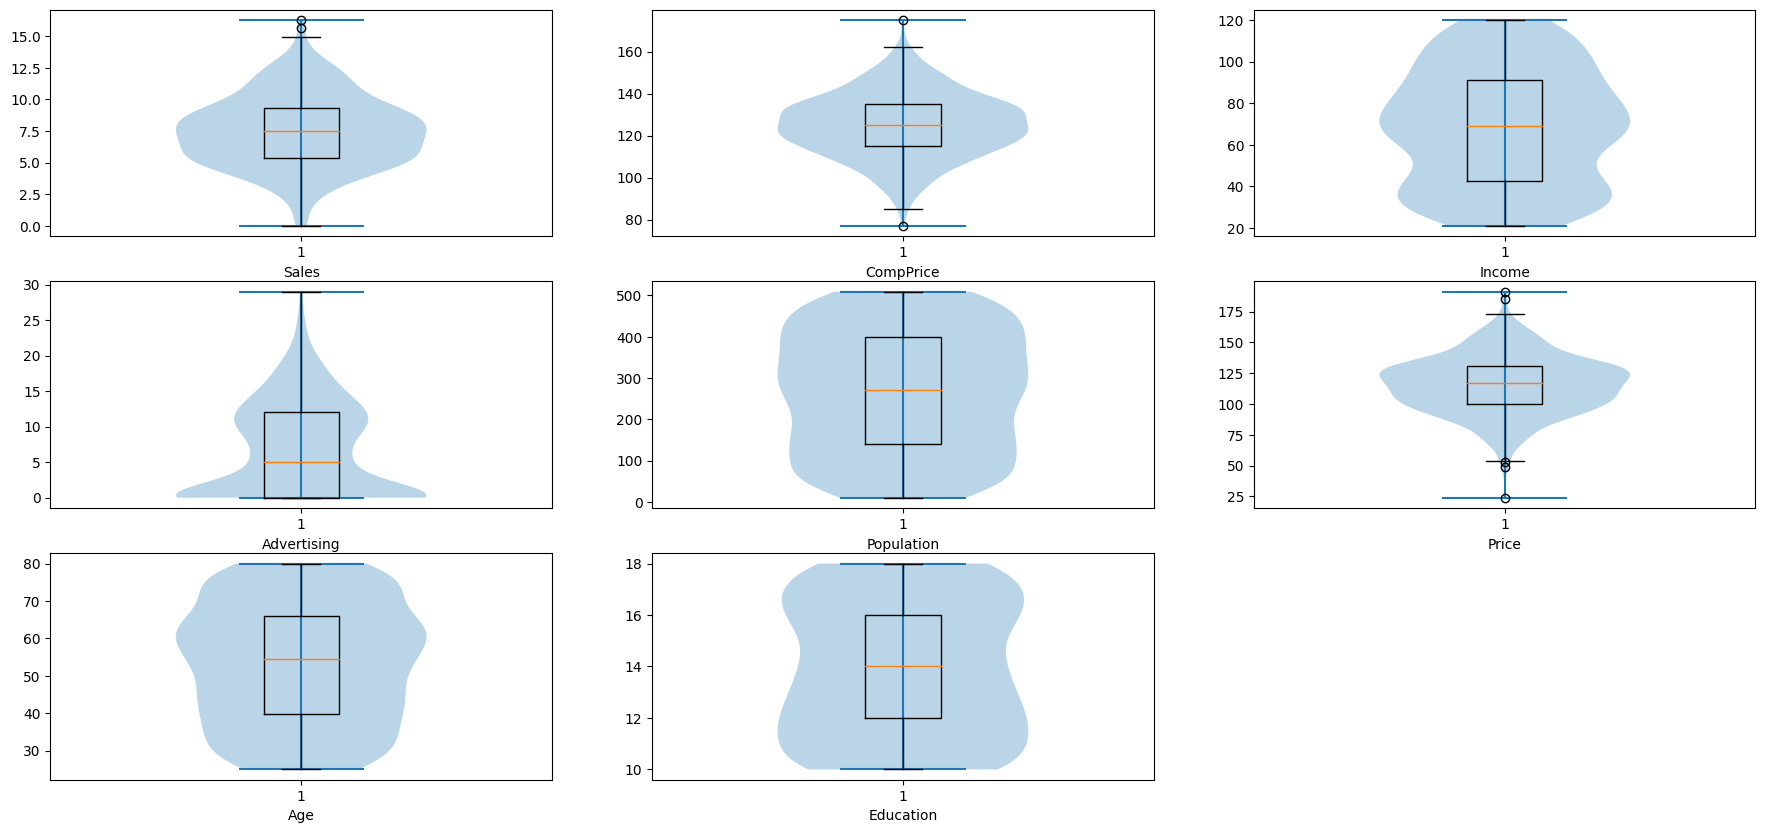

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(company[[feature for feature in company.columns if company[feature].dtypes != 'O']].columns, 1):
    plt.subplot(3,3,i)
    plt.violinplot(company[column])
    plt.boxplot(company[column])
    plt.xlabel(company[column].name)

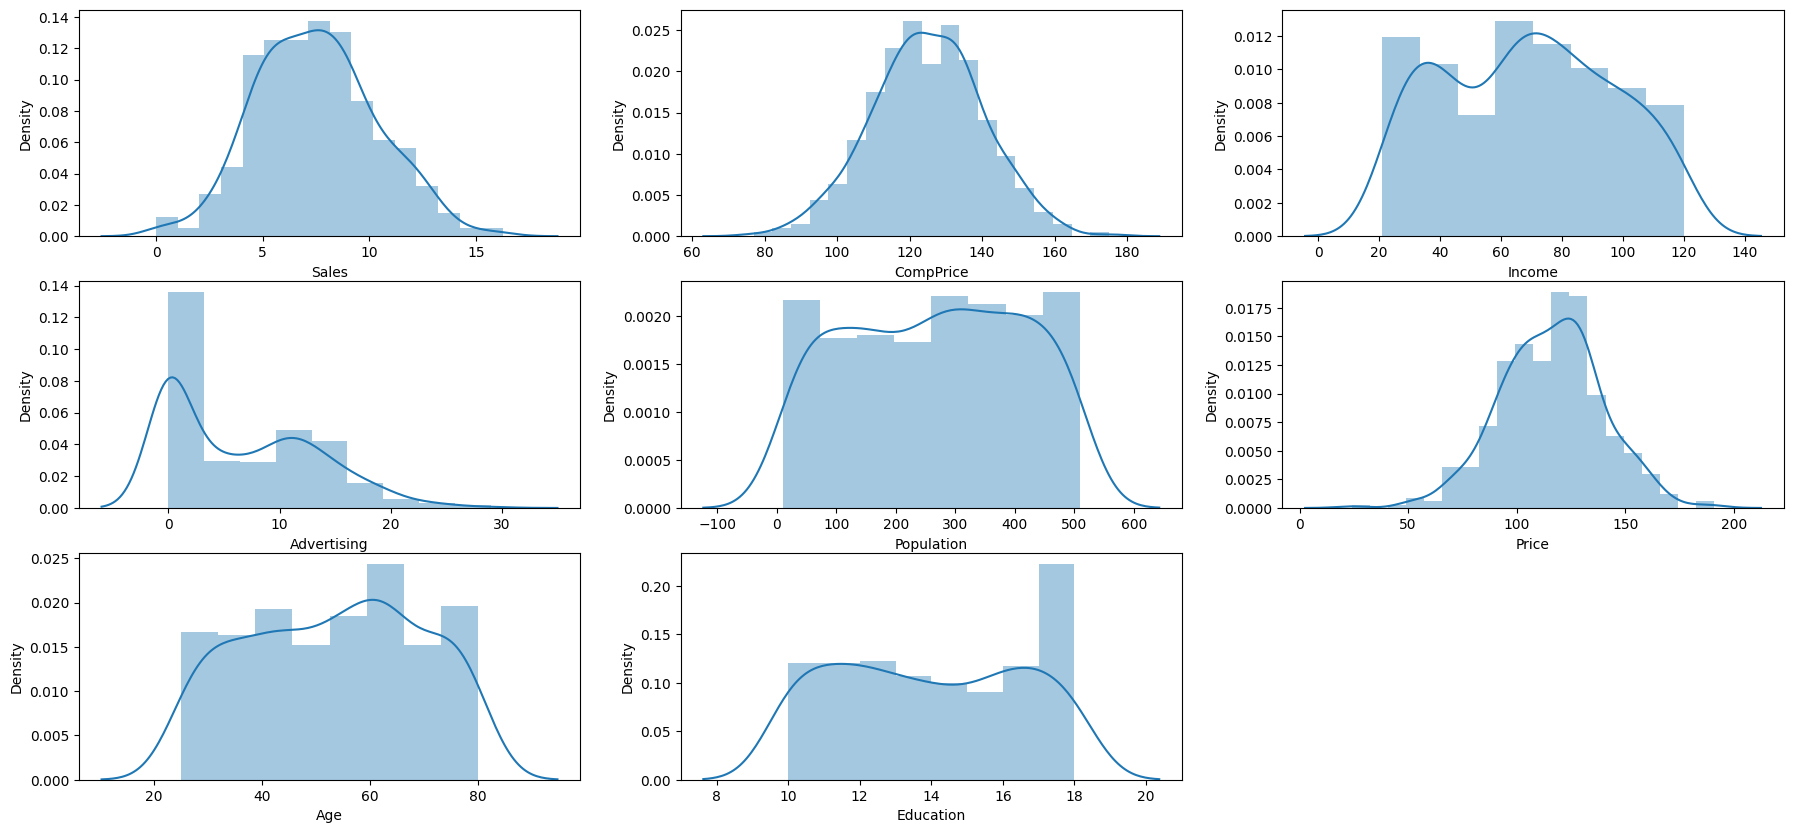

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(company[[feature for feature in company.columns if company[feature].dtypes != 'O']].columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(company[column])

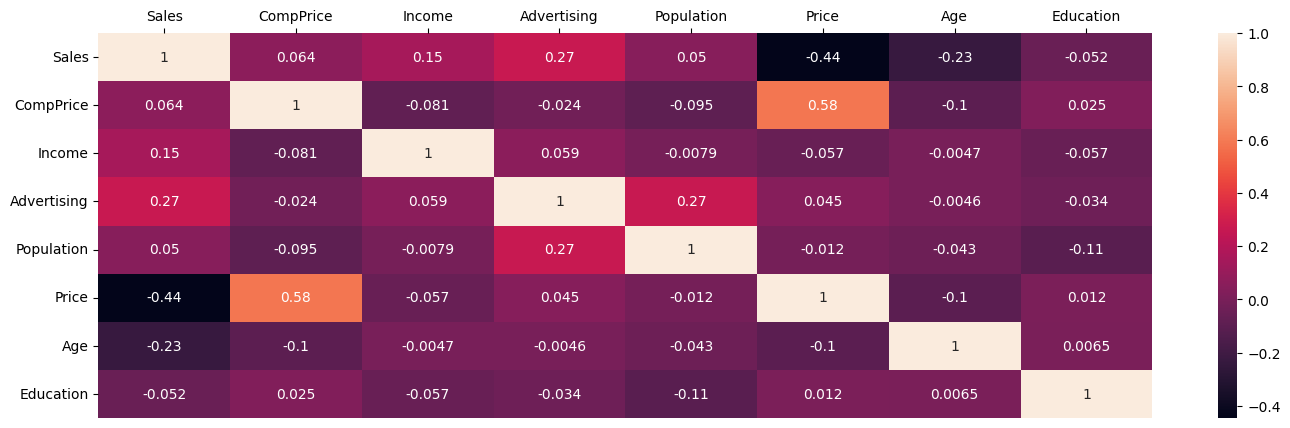

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(17,5))
ax=sns.heatmap(company.corr(), annot=True)
ax.xaxis.tick_top()

<Figure size 2000x1500 with 0 Axes>

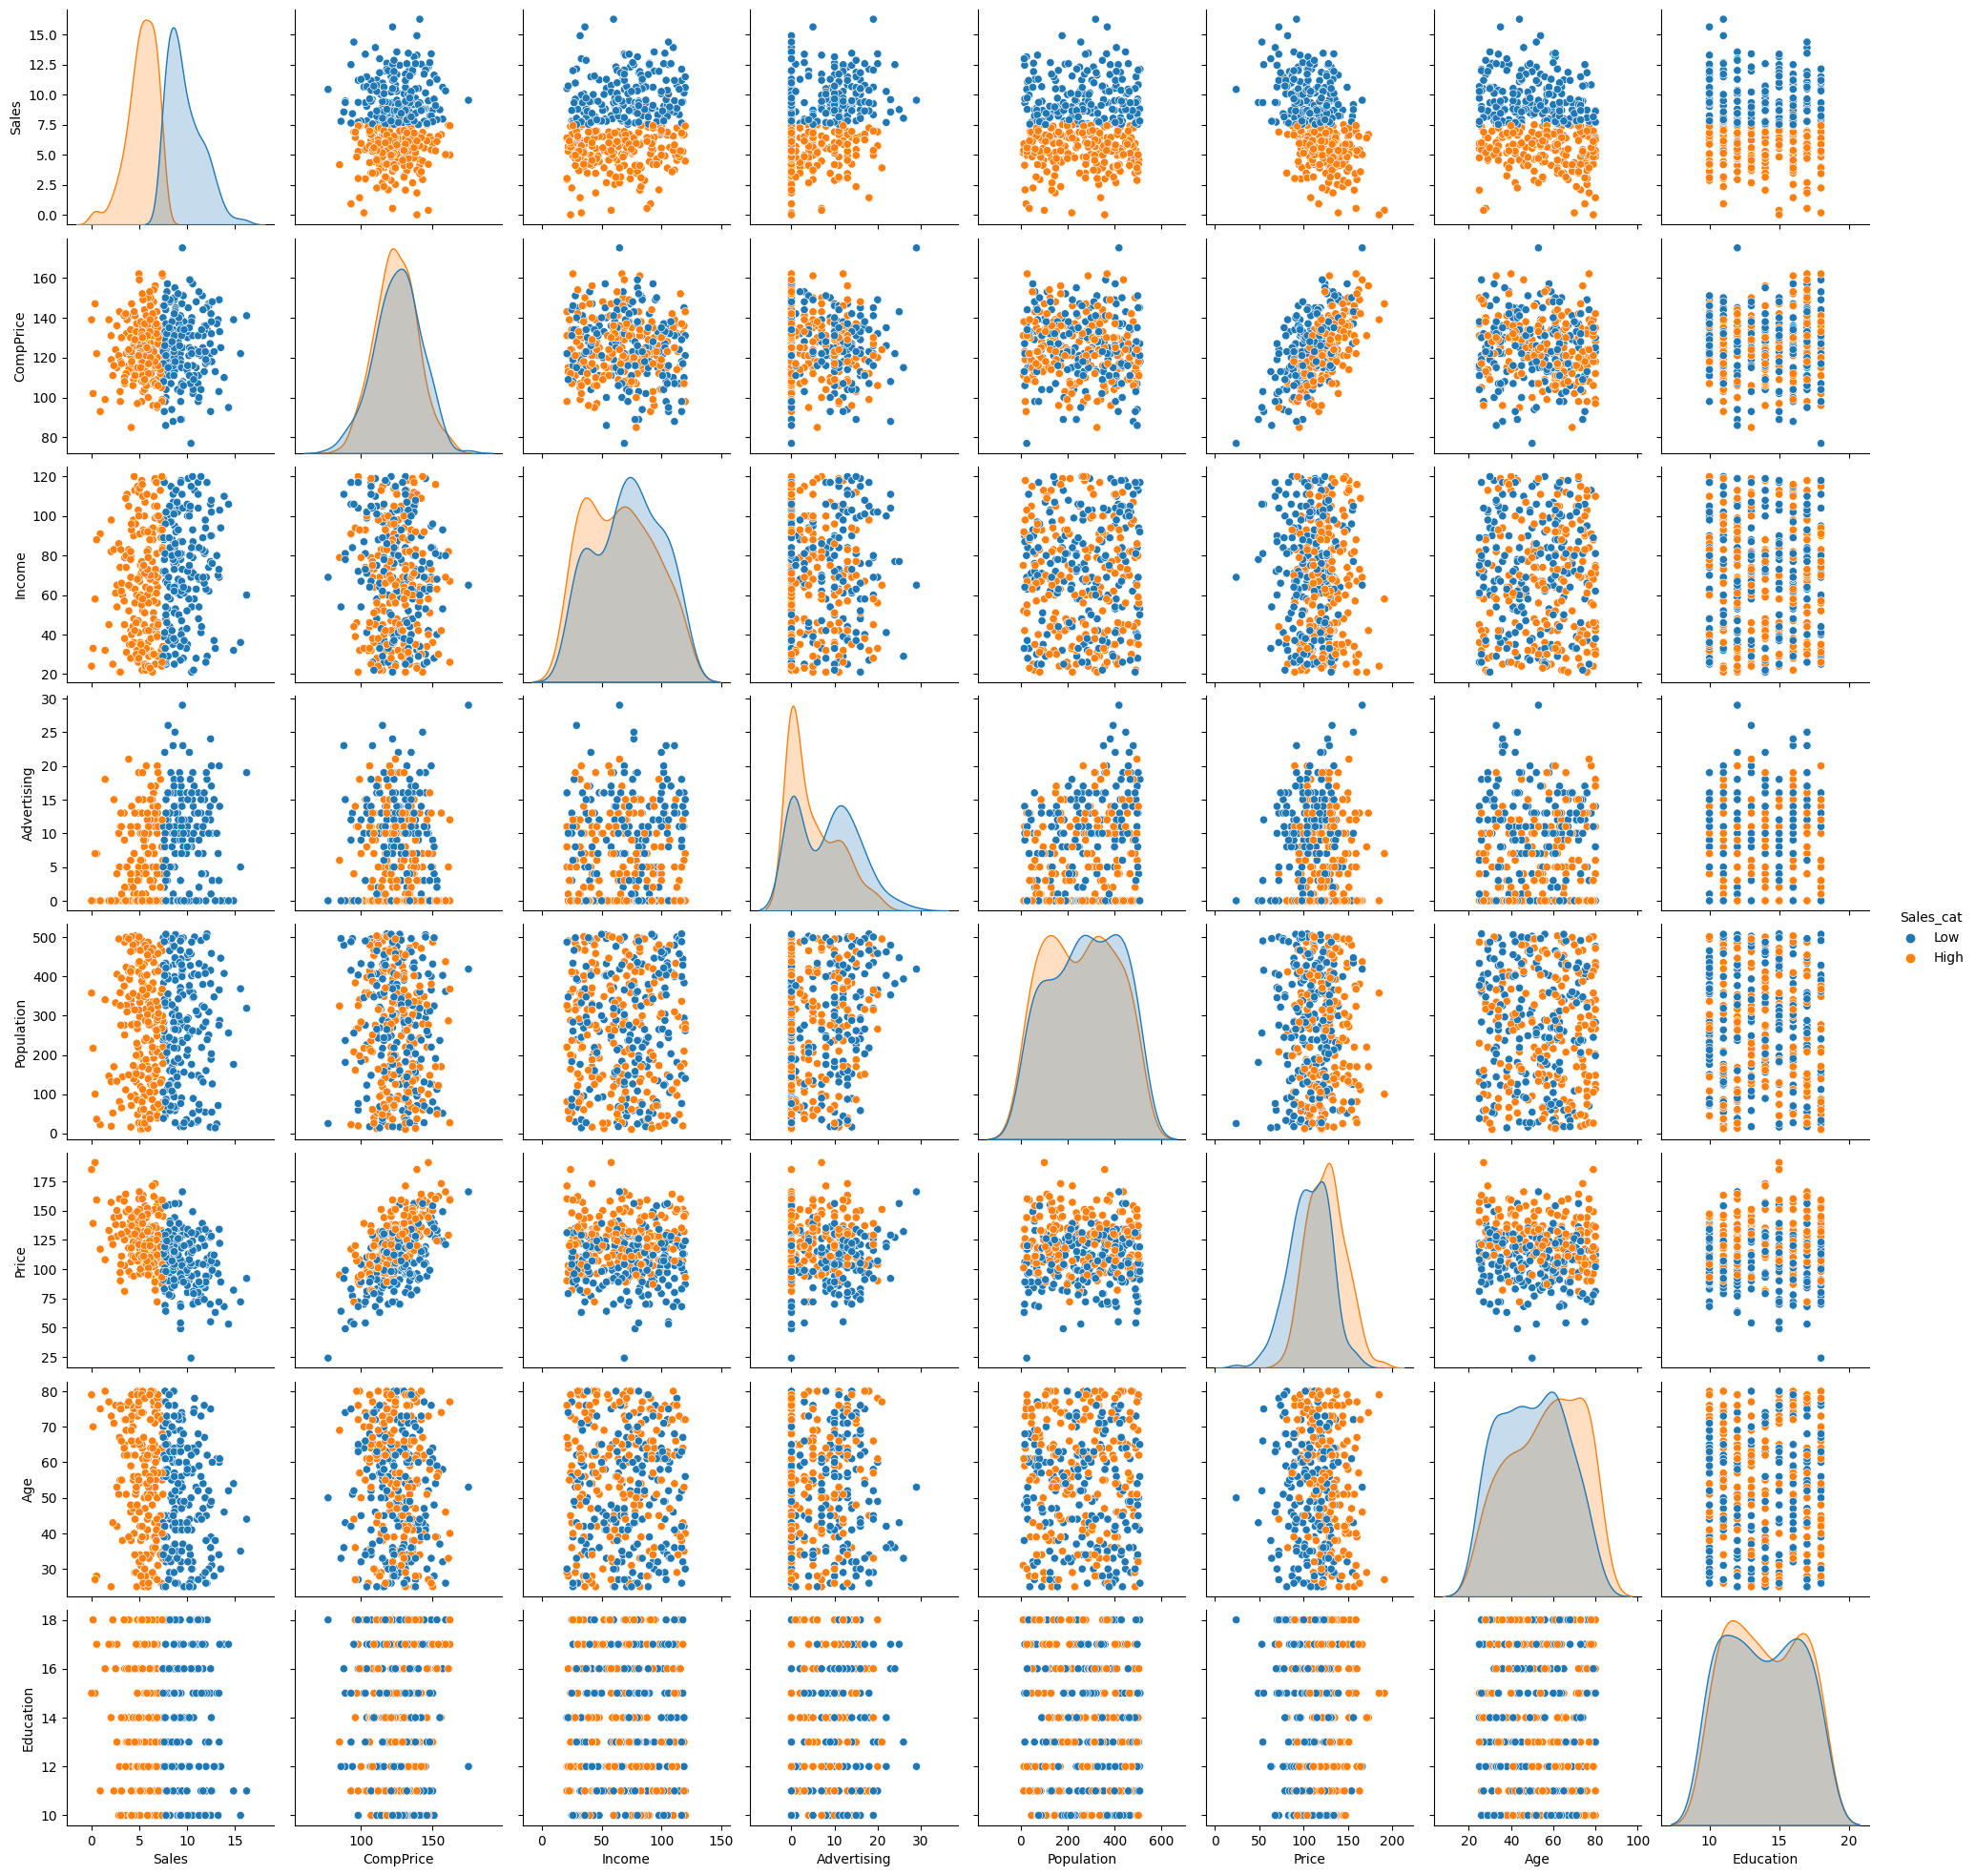

In [ ]:
#pairplot
plt.figure(figsize=(20,15))
sns.pairplot(company,hue='Sales_cat')

label Encoding

In [ ]:
company_lab=company.copy()
for i, column in enumerate(company_lab[[feature for feature in company_lab.columns if company_lab[feature].dtypes == 'O']].columns, 1):
  label_encoder=preprocessing.LabelEncoder()
  company_lab[column]=label_encoder.fit_transform(company_lab[column])

company_lab=company_lab.drop('Sales',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std=MinMaxScaler()
std.fit_transform(company_lab)

array([[0.62244898, 0.52525253, 0.37931034, ..., 1.        , 1.        ,
        1.        ],
       [0.34693878, 0.27272727, 0.55172414, ..., 1.        , 1.        ,
        1.        ],
       [0.36734694, 0.14141414, 0.34482759, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.86734694, 0.05050505, 0.4137931 , ..., 1.        , 1.        ,
        0.        ],
       [0.23469388, 0.58585859, 0.24137931, ..., 1.        , 1.        ,
        0.        ],
       [0.58163265, 0.16161616, 0.        , ..., 1.        , 1.        ,
        1.        ]])

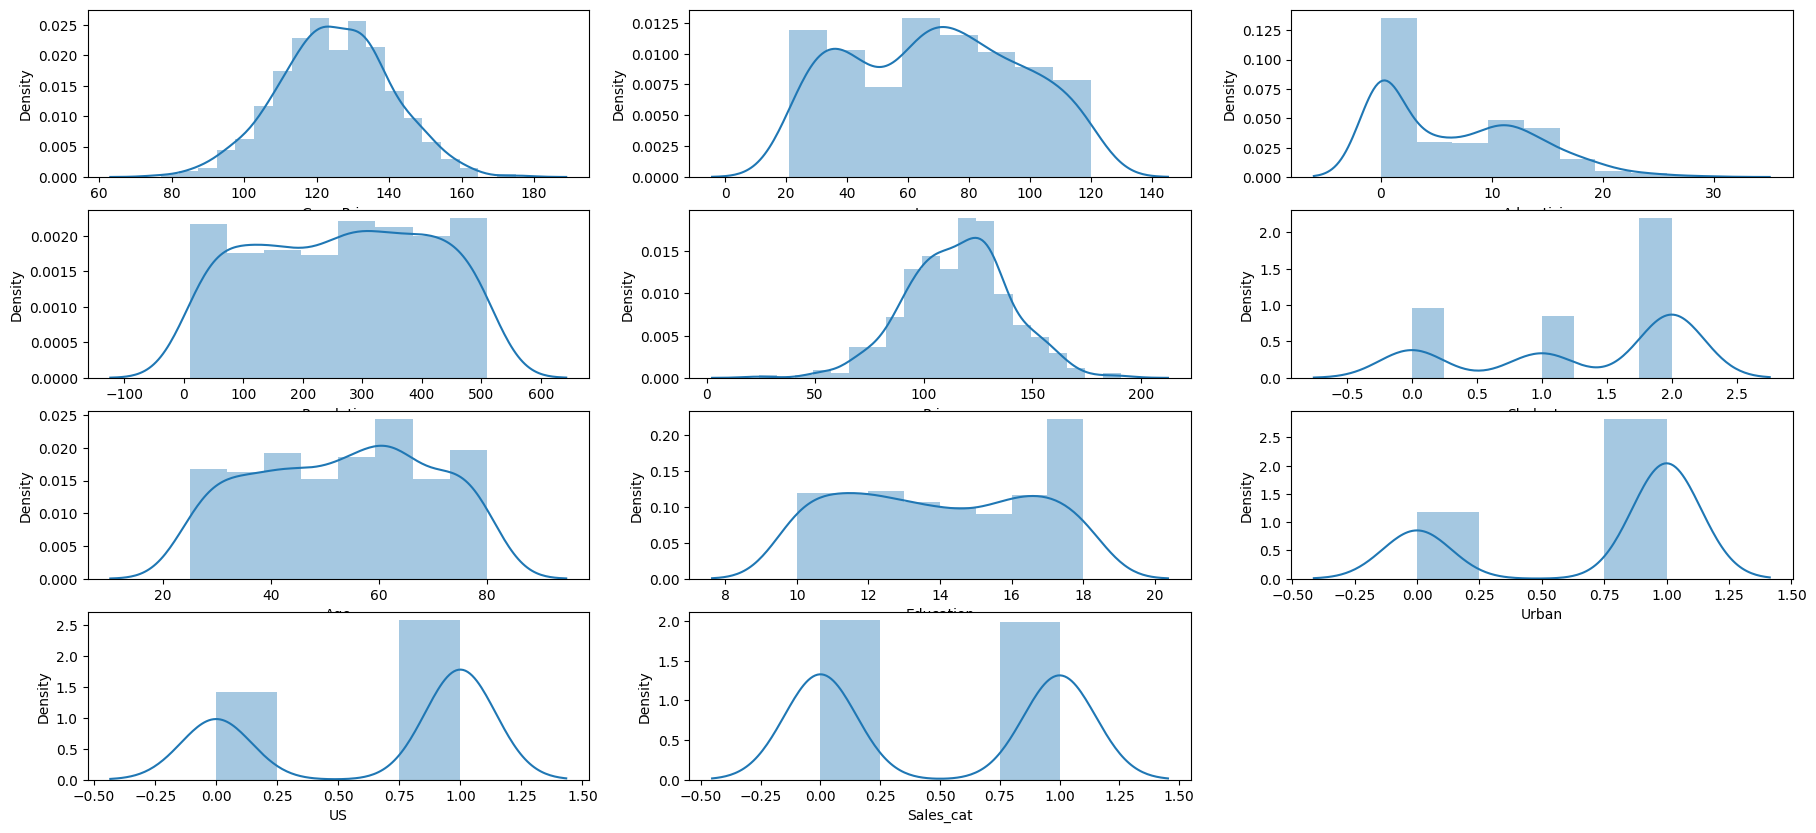

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(company_lab.columns, 1):
    plt.subplot(4,3,i)
    sns.distplot(company_lab[column])

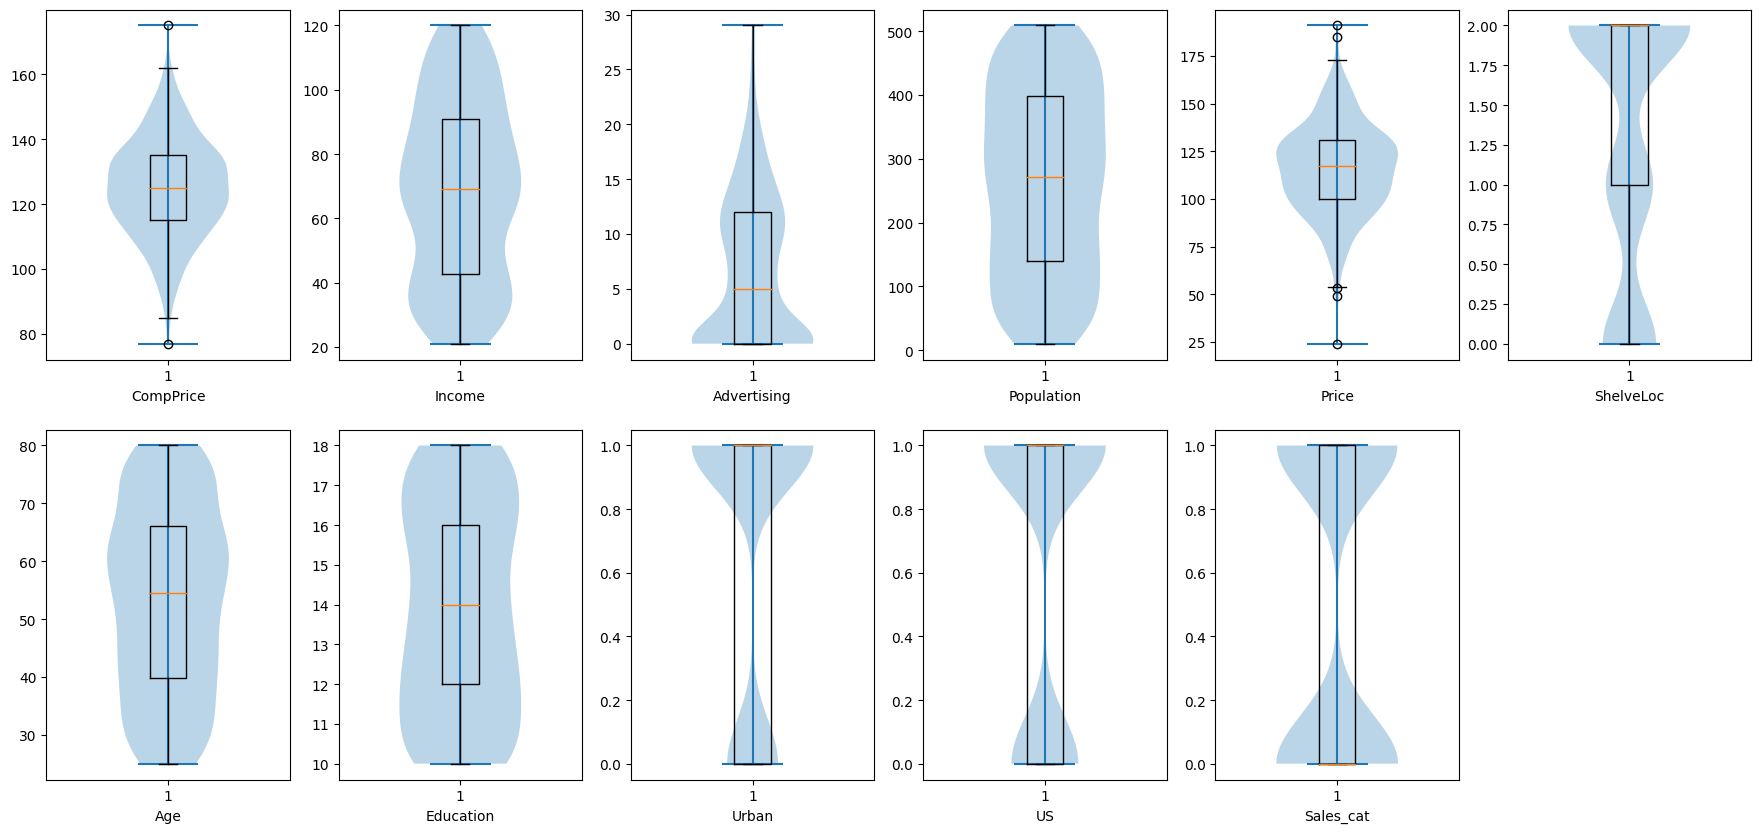

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(company_lab.columns, 1):
    plt.subplot(2,6,i)
    plt.violinplot(company_lab[column])
    plt.boxplot(company_lab[column])
    plt.xlabel(company_lab[column].name)

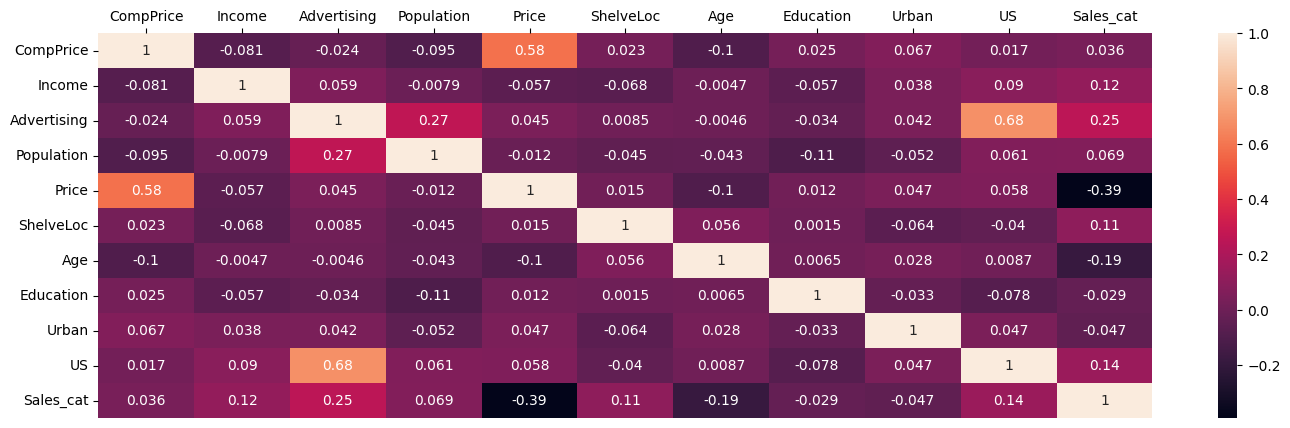

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(17,5))
ax = sns.heatmap(company_lab.corr(), annot=True)
ax.xaxis.tick_top()

<Figure size 2000x1500 with 0 Axes>

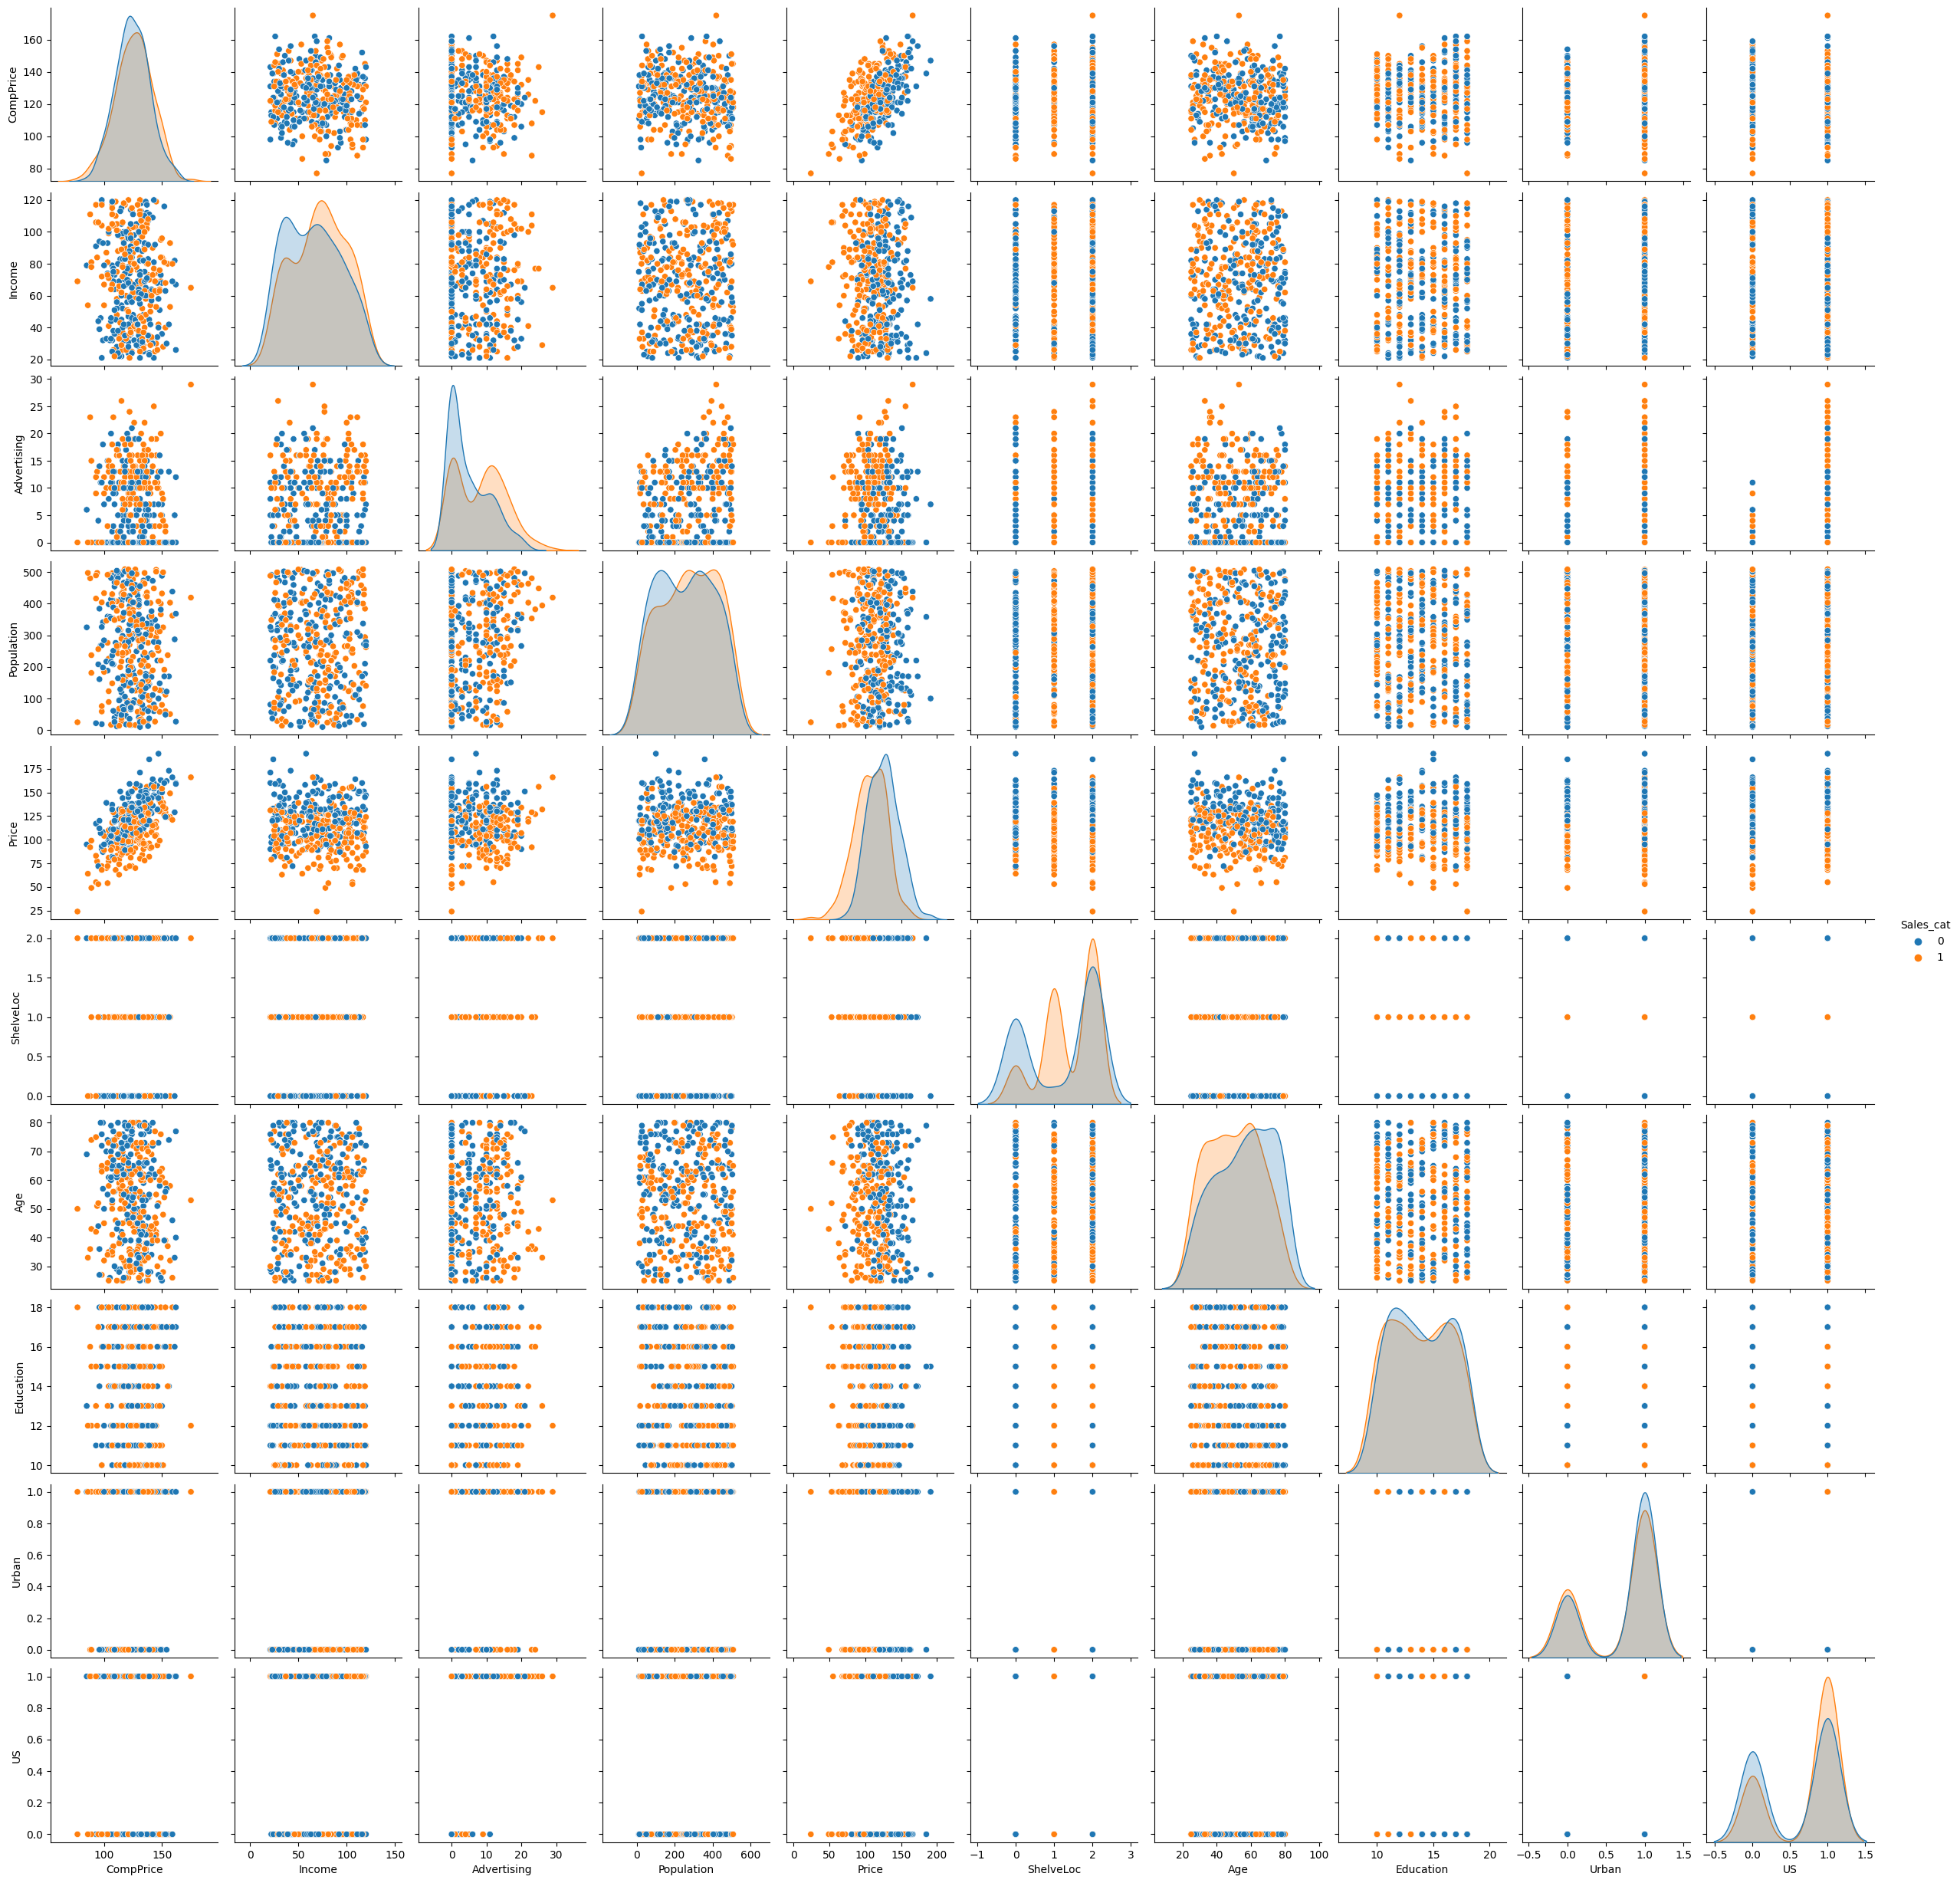

In [ ]:
#pairplot
plt.figure(figsize=(20,15))
sns.pairplot(company_lab,hue='Sales_cat')

Data Splitting for testing

In [ ]:
x=company_lab.drop('Sales_cat',axis=1)
y=company_lab['Sales_cat']

#data--> train data + test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40)

In [ ]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [ ]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_cat, Length: 400, dtype: int64

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test):
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print(f"\n Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"\n CLASSIFICATION REPORT:\n{clf_report}")
        print(f"\nConfusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

In [ ]:
params = {'ccp_alpha':[0.1,.01,.001],"criterion":["gini", "entropy"], "max_depth":(list(range(1,10))), 
          }

tree_clf = DecisionTreeClassifier(random_state= 42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best paramters: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 7})

 Accuracy Score: 91.42%

 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.940171    0.894040  0.914179    0.917105      0.915728
recall       0.873016    0.950704  0.914179    0.911860      0.914179
f1-score     0.905350    0.921502  0.914179    0.913426      0.913908
support    126.000000  142.000000  0.914179  268.000000    268.000000

Confusion Matrix: 
 [[110  16]
 [  7 135]]



In [ ]:
clf=DecisionTreeClassifier(criterion= 'entropy', max_depth= 7)
clf.fit(x_train,y_train)
     

DecisionTreeClassifier(criterion='entropy', max_depth=7)

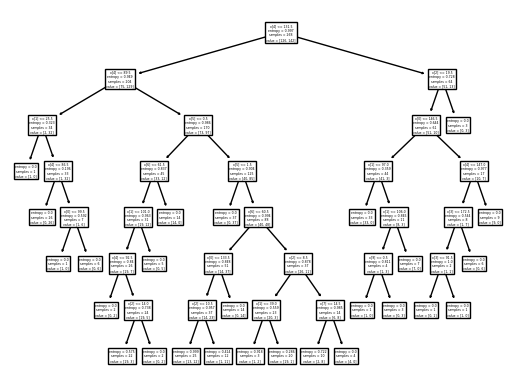

In [ ]:
#decision tree plot
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [ ]:
company_lab.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_cat'],
      dtype='object')

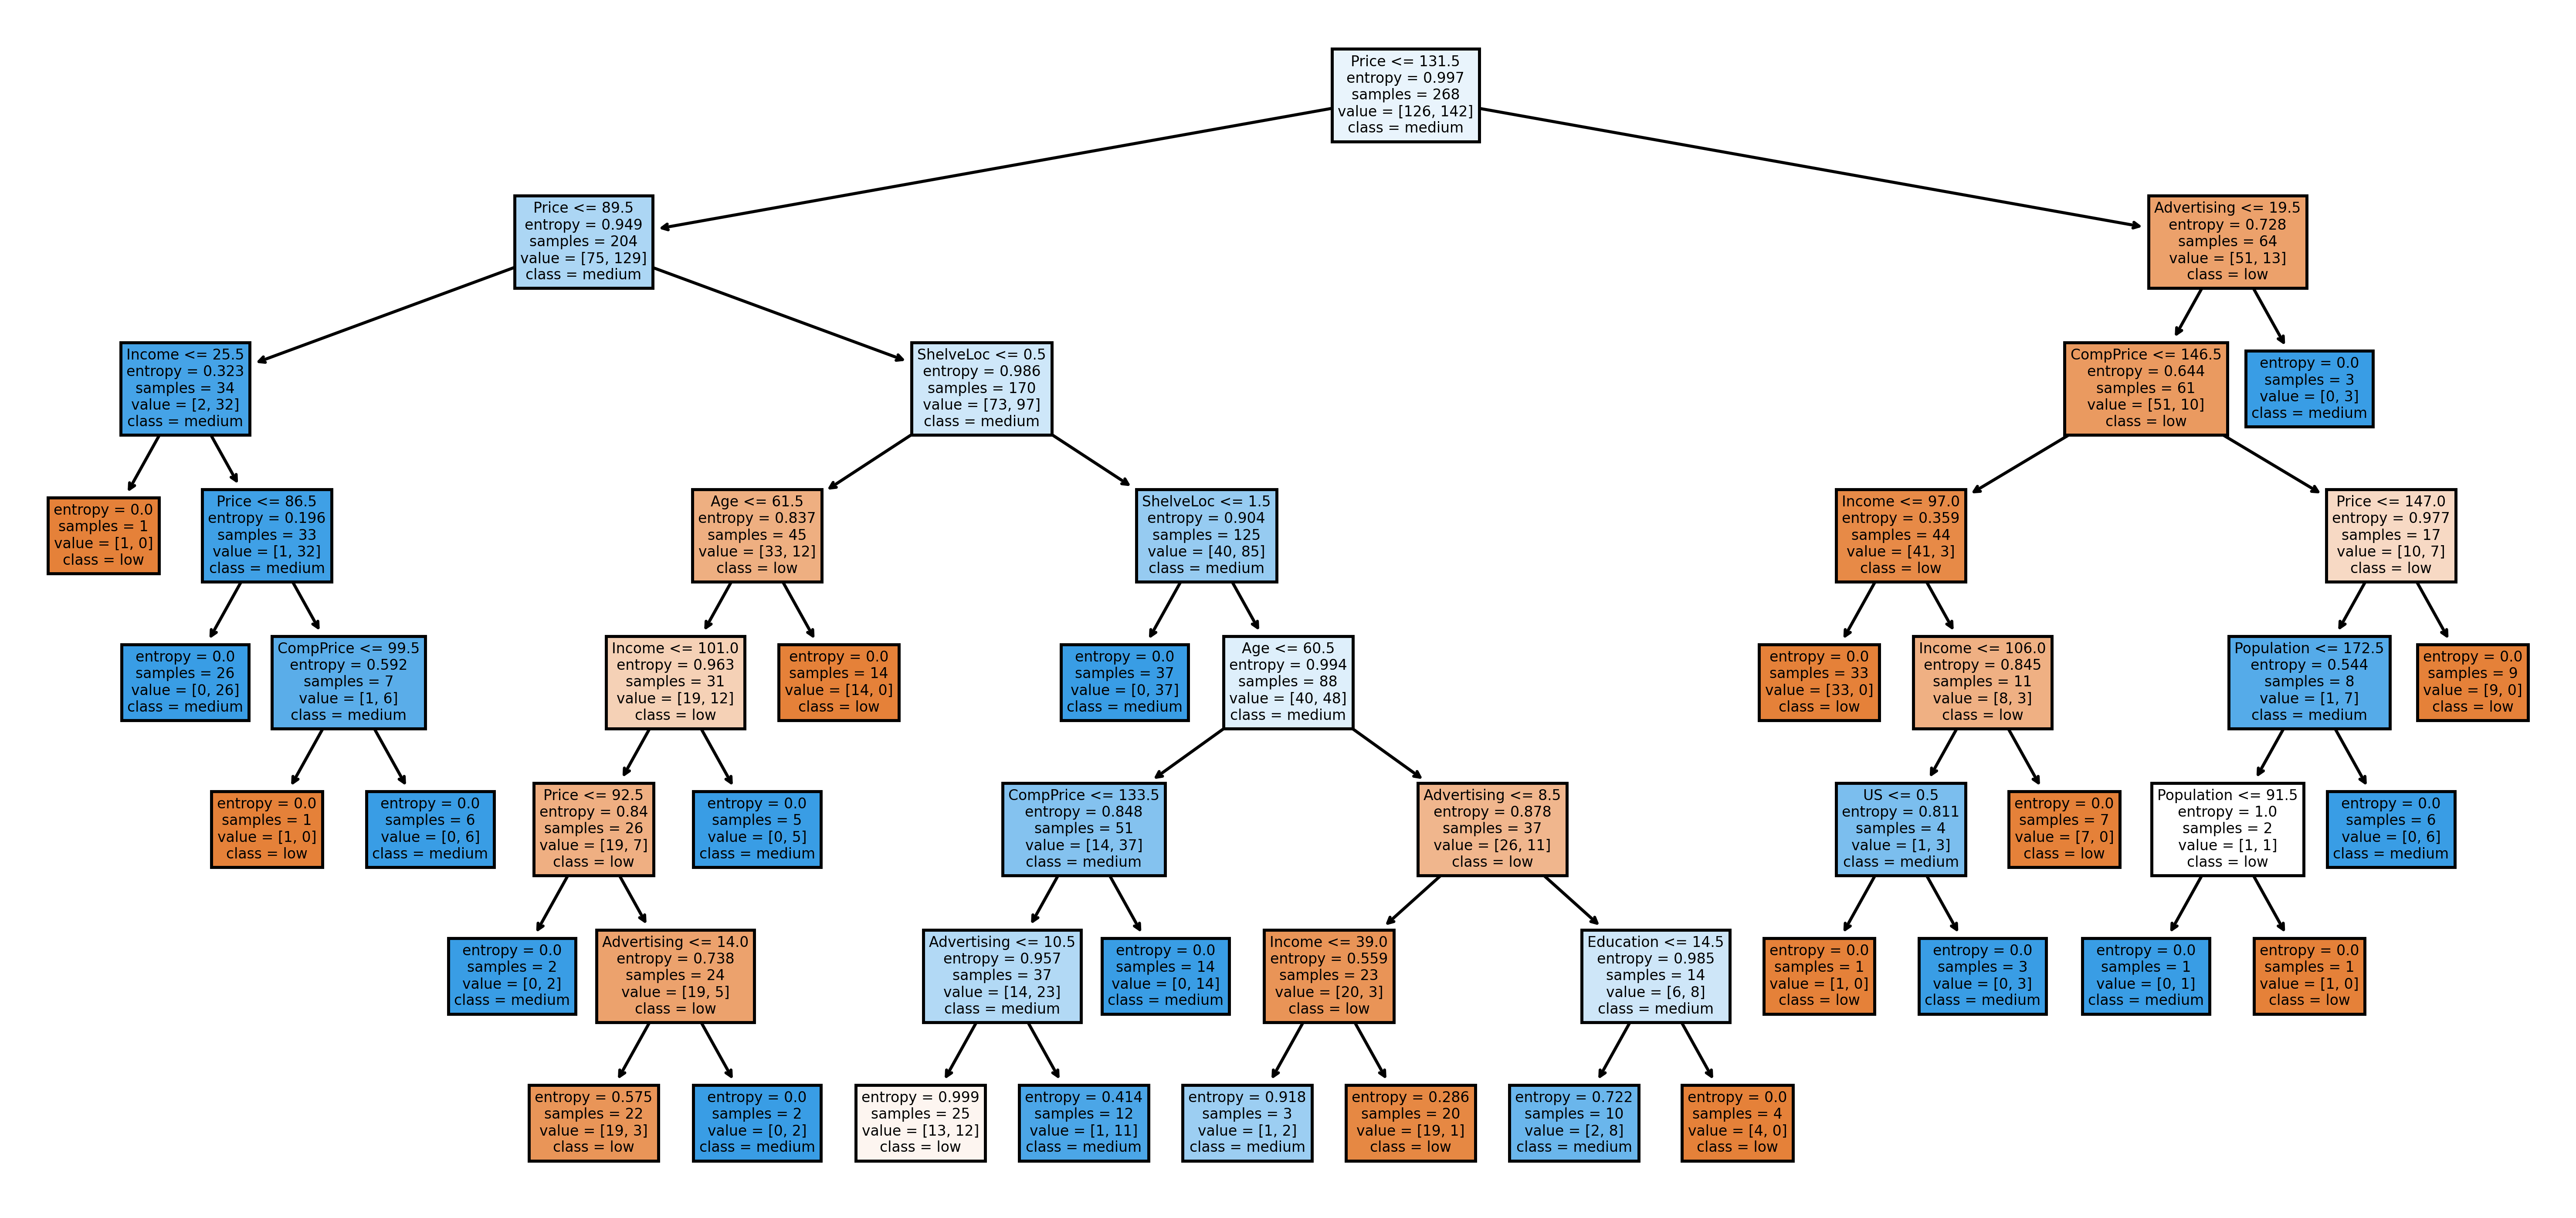

In [ ]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] # .columns
cn=['low','medium','high'] #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,7), dpi=500) #dpi=dotperinch
tree.plot_tree(clf,
               feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
#test data prediction 
preds=clf.predict(x_test)
pd.Series(preds).value_counts()

0    78
1    54
dtype: int64

In [ ]:
y_test.value_counts()

0    75
1    57
Name: Sales_cat, dtype: int64

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        75
           1       0.63      0.60      0.61        57

    accuracy                           0.67       132
   macro avg       0.67      0.66      0.67       132
weighted avg       0.67      0.67      0.67       132



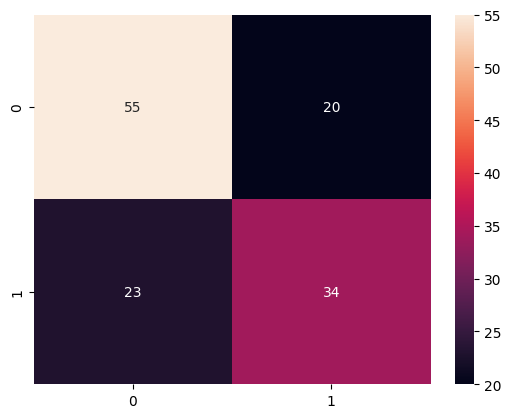

In [ ]:
from sklearn import metrics
sns.heatmap(metrics.confusion_matrix(y_test, preds),annot=True)
print(classification_report(y_test,preds))

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.6742424242424242

In [ ]:
np.mean(preds==y_test)

0.6742424242424242

0.6742424242424242

In [ ]:
# define a function for plotting the feature importances
def plot_feature_importances(model):
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots()
    feature_importances.plot.bar()
    ax.set_title("Feature importances")
    fig.tight_layout()


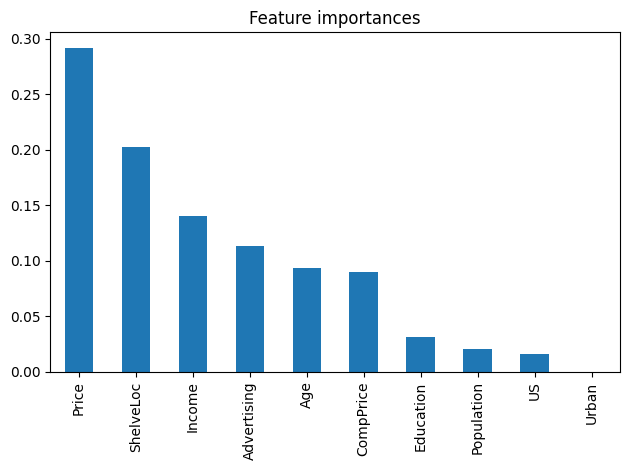

In [ ]:
plot_feature_importances(clf)

Building Decision Tree Classifire (CART)using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini', max_depth= 4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# prediction ,accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.696969696969697

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        75
           1       0.63      0.70      0.67        57

    accuracy                           0.70       132
   macro avg       0.69      0.70      0.69       132
weighted avg       0.70      0.70      0.70       132



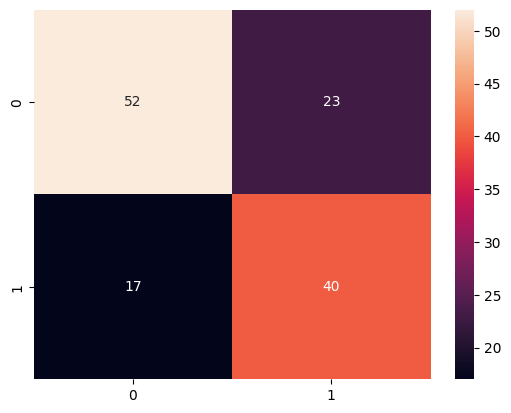

In [ ]:
from sklearn import metrics
sns.heatmap(metrics.confusion_matrix(y_test, pred),annot=True)
print(classification_report(y_test,pred))

In [ ]:
prediction=pd.DataFrame({"actual":y_test,"predicted":pred})
prediction

actual  predicted
132       1          0
390       0          0
310       1          1
3         0          1
248       0          0
..      ...        ...
215       0          0
314       1          1
259       0          1
49        1          0
227       1          1

[132 rows x 2 columns]

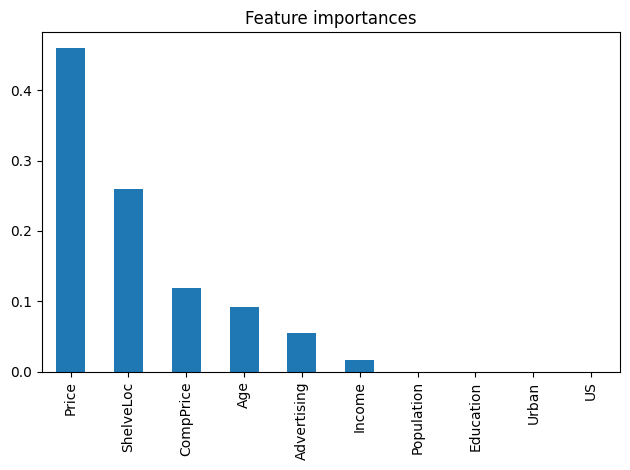

In [ ]:
plot_feature_importances(model_gini)

Bagging

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

kfold=KFold(n_splits=10)#evaluation method
cart=DecisionTreeClassifier()
num_trees = 100

model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=42)#classifier
results=cross_val_score(model,x,y,cv=kfold)

In [ ]:
model.fit(x_train, y_train);
print('\n confusion matrix :\n',confusion_matrix(y_test,model.predict(x_test)))
print('\n accuarcy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[58 17]
 [12 45]]

 accuarcy :
 0.7803030303030303


Boosting

In [ ]:
from pandas.core.common import random_state
#AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=0
kfold = KFold(n_splits=10)

model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)

In [ ]:
model.fit(x_train, y_train);
print('\n confusion matrix :\n',confusion_matrix(y_test,model.predict(x_test)))
print('\n accuarcy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[57 18]
 [11 46]]

 accuarcy :
 0.7803030303030303


Conclusion:

In [ ]:
# comparing accuracy of models
Accuracy_tb={'Model':pd.Series(['Entropy','gini','Bagging','Boosting']),
     'accuracy':pd.Series(['65%','70%','78%','78%'])}
     
Accuracy_tb=pd.DataFrame(Accuracy_tb)
Accuracy_tb.style.set_properties(**{'background-color': 'darkkhaki',
                           'color': 'darkred'})